In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
import tikzplotlib

figureheight='5cm'
figurewidth='14cm'

In [3]:
timeLabel = '$t$, time[seconds]'

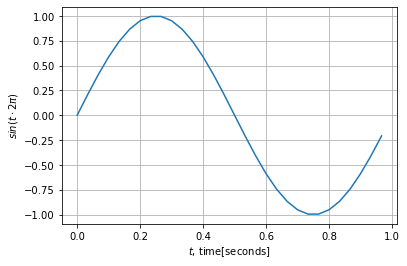

In [4]:
sr = 30
T = 1
N = sr*T
n = arange(N)
t = n/sr
f = 1
y = sin(2*pi*t*f)
plot(t,y)
grid(True)
xlabel(timeLabel)
ylabel('$sin(t \cdot 2 \pi)$')
tikzplotlib.save("sinPlot1.tex")

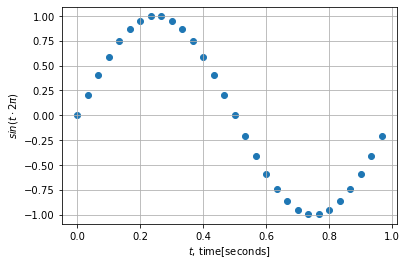

In [5]:
scatter(t,y)
grid(True)
xlabel(timeLabel)
ylabel('$sin(t \cdot 2 \pi)$')
tikzplotlib.save("sinPlotScatter.tex")

C:\Users\hrtlacek\Anaconda3\envs\td1\lib\site-packages\ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


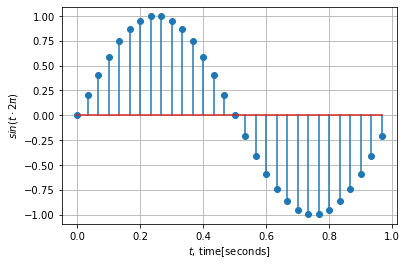

In [6]:
stem(t,y)
grid(True)
xlabel(timeLabel)
ylabel('$sin(t \cdot 2 \pi)$')
tikzplotlib.save("sinPlotStem.tex")

In [7]:
# For plotting the original signal, we use an adequate sampling rate (fs_h =70Hz)
fs_h = 70. #sample rate
T = 1. #duration in seconds
N_h = int(T*fs_h) #number of samples
n_h = arange(N_h) #sample index array
t_h = n_h/fs_h #time index array

# For showing the effect of aliasing we use a low sampling rate (fs_l = 4Hz)
fs_l = 4. #sample rate
N_l = int(T*fs_l) #number of samples
n_l = arange(N_l) #sample index array
t_l = n_l/fs_l #time index array


In [8]:
def alias(f, sr):
  nyq = sr/2
  fout = f%nyq #get the aliased frequency
  fout*=(1+((floor(f/nyq))%2)*-2) #correct phase every second round
  return fout

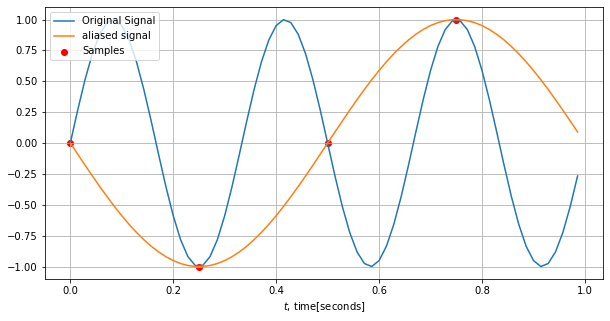

In [9]:
f = 3 #Hz, try different values here!
x1 = sin(2*pi*t_h*f)
sampled = sin(2*pi*t_l*f)
# Nyq_l = fs_l/2
aliasedFeq = alias(f,fs_l)
aliased = sin(2*pi*t_h*aliasedFeq)
figure(figsize=[10,5])
plot(t_h,x1, label='Original Signal')
scatter(t_l,sampled, label='Samples',c='r')
plot(t_h,aliased, label='aliased signal')
xlabel(timeLabel)
legend(loc=2)
grid(True)
tikzplotlib.save("aliasTime.tex")

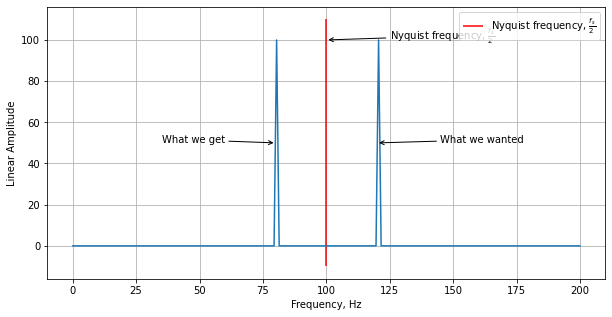

In [15]:
sr = 200
f = 120
T = 1
N = sr*T
n = arange(N)
t = n/sr
sig = sin(f*t*2*pi)

f_alias = sr/2 - abs(alias(f,sr))

freqAxis = linspace(0,sr,N)
spec1 = abs(fft.fft(sig))
figure(figsize=[10,5])
plot(freqAxis, spec1)
vlines(sr/2,0-10,max(spec1)*1.1,colors='r',label=r'Nyquist frequency, $\frac{f_s}{2}$')
xlabel('Frequency, Hz')
ylabel('Linear Amplitude')
legend()
annotate(r'Nyquist frequency, $\frac{f_s}{2}$',[sr/2,100],xytext=[sr/2+25,100],arrowprops=dict(arrowstyle="->"))
annotate(r'What we wanted',[f,50],xytext=[f+25,50],arrowprops=dict(arrowstyle="->"))
annotate(r'What we get',[f_alias,50],xytext=[f_alias-20,50],arrowprops=dict(arrowstyle="->"),ha='right')
grid()
tikzplotlib.save("aliasFreq.tex", axis_height=figureheight,axis_width=figurewidth)

In [11]:
f_alias

80.0